<a href="https://colab.research.google.com/github/websitecreatr99/Solytics/blob/main/sol_vecm_ts_statsmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VECM 

https://towardsdatascience.com/vector-autoregressions-vector-error-correction-multivariate-model-a69daf6ab618

https://gist.github.com/yogabonito/b532e20b64587c19198f1aacb5ddfca2#file-vecm_example-ipynb

In [ ]:
!pip install -r req.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 82.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 93.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.7/166.7 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 107.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.1/303.1 kB 30.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: lxml
    Found existing installation: lxml 4.9.2
    Uninstalling lxml-4.9.2:
   

In [ ]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.vector_ar.vecm import *
import pandas as pd

/usr/local/lib/python3.10/dist-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [ ]:
# import statsmodels.datasets.interest_inflation.data as d
# df = d.load_pandas().data
# dates = df[["year", "quarter"]].astype(int).astype(str)
# # print(dates)
# quarterly = dates["year"] + "Q" + dates["quarter"]
# print(quarterly)
# from statsmodels.tsa.base.datetools import dates_from_str
# quarterly = dates_from_str(quarterly)
# # print(quarterly)
# data = df[["Dp", "R"]]
# data.index = pd.DatetimeIndex(quarterly)
# data

df = pd.read_csv('/content/data_time.csv')
df.set_index("date", inplace = True)
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [ ]:
lag_order = select_order(data=df.astype(float), maxlags=10, deterministic="ci", seasons=4)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:586: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:586: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None
/usr/local/lib/python3.10/dist-packages/statsmod

In [ ]:
lag_order.aic, lag_order.bic, lag_order.fpe, lag_order.hqic

(5, 0, 5, 3)

In [ ]:
rank_test = select_coint_rank(df, 0, 3, method="trace",
                              signif=0.05)
rank_test.rank

4

In [ ]:
pd.Series(["Spark","PySpark","Hadoop"])


0      Spark
1    PySpark
2     Hadoop
dtype: object

In [ ]:
model = VECM(np.asarray(df), deterministic="ci", seasons=4,
             k_ar_diff=lag_order.aic,  # =3
             coint_rank=rank_test.rank)  # =1

In [ ]:
print(type(model))

<class 'statsmodels.tsa.vector_ar.vecm.VECM'>


In [ ]:
vecm_res = model.fit()
type(vecm_res)

statsmodels.tsa.vector_ar.vecm.VECMResults

In [ ]:
vecm_res.predict(6)

array([[  11.86398426,   89.79106055,    2.45645377, 1028.23069653],
       [  12.5921276 ,   87.51335139,    2.97199643, 1047.42689971],
       [  13.33740746,   86.34151103,    3.33009514,  994.87868969],
       [  13.47695606,   85.48256866,    4.33787278, 1001.94780542],
       [  13.64733503,   84.03961722,    4.53189803, 1026.72226761],
       [  13.27412706,   84.72111538,    4.37452467, 1003.77305154]])

In [ ]:
vecm_res.fittedvalues

array([[   7.30772751,   83.14932023,    2.6830848 , 1030.28329558],
       [   7.28646748,   78.06641729,    4.56939712, 1011.48545274],
       [   8.50457559,   66.90098703,    6.04387701, 1028.58454189],
       ...,
       [  15.93807816,   87.24433592,    3.86949265,  984.88566388],
       [  14.55444448,   85.70825059,    5.74799898, 1034.91161349],
       [  15.54359344,   82.73179623,    5.14913574, 1047.90991585]])

In [ ]:
for i in vecm_res.predict(steps=5):
  print(i[-1])
vecm_res.predict(steps=5)

1028.2306965279054
1047.4268997082886
994.8786896925212
1001.9478054247502
1026.7222676067508


array([[  11.86398426,   89.79106055,    2.45645377, 1028.23069653],
       [  12.5921276 ,   87.51335139,    2.97199643, 1047.42689971],
       [  13.33740746,   86.34151103,    3.33009514,  994.87868969],
       [  13.47695606,   85.48256866,    4.33787278, 1001.94780542],
       [  13.64733503,   84.03961722,    4.53189803, 1026.72226761]])

In [ ]:
vecm_res.predict(steps=5, alpha=0.05)

(array([[  11.86398426,   89.79106055,    2.45645377, 1028.23069653],
        [  12.5921276 ,   87.51335139,    2.97199643, 1047.42689971],
        [  13.33740746,   86.34151103,    3.33009514,  994.87868969],
        [  13.47695606,   85.48256866,    4.33787278, 1001.94780542],
        [  13.64733503,   84.03961722,    4.53189803, 1026.72226761]]),
 array([[  8.75465126,  74.73050811,  -5.26997044, 679.28766647],
        [  8.65335047,  68.18298137,  -5.37505136, 698.4591028 ],
        [  8.88629446,  64.90217417,  -5.1417886 , 644.579665  ],
        [  8.7356905 ,  63.03440521,  -4.20744836, 651.2576102 ],
        [  8.65049277,  60.85683241,  -4.03446401, 675.60832545]]),
 array([[  14.97331727,  104.85161299,   10.18287797, 1377.17372658],
        [  16.53090474,  106.84372141,   11.31904423, 1396.39469662],
        [  17.78852046,  107.7808479 ,   11.80197889, 1345.17771438],
        [  18.21822161,  107.93073211,   12.88319392, 1352.63800065],
        [  18.64417729,  107.2224020

In [ ]:
# Save the model
import joblib
joblib.dump(vecm_res, 'VECM_v.pkl') 

# # Load the model from the file 
model = joblib.load(open('VECM_v.pkl','rb')) 

In [ ]:
exogk = vecm_res.data.orig_exog
vecm_res.predict(steps=5,exog_fc=exogk)

AttributeError: ignored

In [ ]:
vecm_res.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
season1,0.0468,0.119,0.394,0.694,-0.186,0.280
season2,0.0215,0.118,0.182,0.856,-0.210,0.253
season3,0.0958,0.119,0.808,0.419,-0.137,0.328
L1.y1,-0.1747,0.035,-4.969,0.000,-0.244,-0.106
L1.y2,0.0051,0.008,0.663,0.507,-0.010,0.020
L1.y3,-0.0624,0.017,-3.602,0.000,-0.096,-0.028
L1.y4,-0.0013,0.001,-2.556,0.011,-0.002,-0.000
L2.y1,-0.1475,0.035,-4.175,0.000,-0.217,-0.078
L2.y2,-0.0059,0.008,-0.776,0.438,-0.021,0.009
L2.y3,-0.0567,0.016,-3.498,0.000,-0.089,-0.025


In [ ]:
vecm_res.alpha

array([[-1.96108340e-02,  3.41322895e-03,  4.11009951e-02,
         1.35622459e-03],
       [-4.17601014e-02, -8.19263935e-02,  1.22527299e-02,
        -4.53138985e-03],
       [ 7.85053524e-02, -1.42474046e-02, -5.45216344e-01,
        -1.03198472e-03],
       [-1.82922941e+00, -4.79113855e-01,  1.47893727e+00,
        -9.81571298e-01]])

In [ ]:
vecm_res.stderr_alpha

array([[7.49553248e-03, 3.61267201e-03, 1.75746613e-02, 5.63354236e-04],
       [3.63058122e-02, 1.74985555e-02, 8.51256870e-02, 2.72869647e-03],
       [1.86257514e-02, 8.97717820e-03, 4.36715168e-02, 1.39988666e-03],
       [8.41181633e-01, 4.05429948e-01, 1.97230582e+00, 6.32220909e-02]])

In [ ]:
vecm_res.predict(steps=5)

array([[  11.86398426,   89.79106055,    2.45645377, 1028.23069653],
       [  12.5921276 ,   87.51335139,    2.97199643, 1047.42689971],
       [  13.33740746,   86.34151103,    3.33009514,  994.87868969],
       [  13.47695606,   85.48256866,    4.33787278, 1001.94780542],
       [  13.64733503,   84.03961722,    4.53189803, 1026.72226761]])

In [ ]:
vecm_res.predict(steps=5, alpha=0.05)
for text, vaĺues in zip(("forecast", "lower", "upper"), vecm_res.predict(steps=5, alpha=0.05)):
    print(text+":", vaĺues, sep="\n")

forecast:
[[  11.86398426   89.79106055    2.45645377 1028.23069653]
 [  12.5921276    87.51335139    2.97199643 1047.42689971]
 [  13.33740746   86.34151103    3.33009514  994.87868969]
 [  13.47695606   85.48256866    4.33787278 1001.94780542]
 [  13.64733503   84.03961722    4.53189803 1026.72226761]]
lower:
[[  8.75465126  74.73050811  -5.26997044 679.28766647]
 [  8.65335047  68.18298137  -5.37505136 698.4591028 ]
 [  8.88629446  64.90217417  -5.1417886  644.579665  ]
 [  8.7356905   63.03440521  -4.20744836 651.2576102 ]
 [  8.65049277  60.85683241  -4.03446401 675.60832545]]
upper:
[[  14.97331727  104.85161299   10.18287797 1377.17372658]
 [  16.53090474  106.84372141   11.31904423 1396.39469662]
 [  17.78852046  107.7808479    11.80197889 1345.17771438]
 [  18.21822161  107.93073211   12.88319392 1352.63800065]
 [  18.64417729  107.22240204   13.09826006 1377.83620976]]


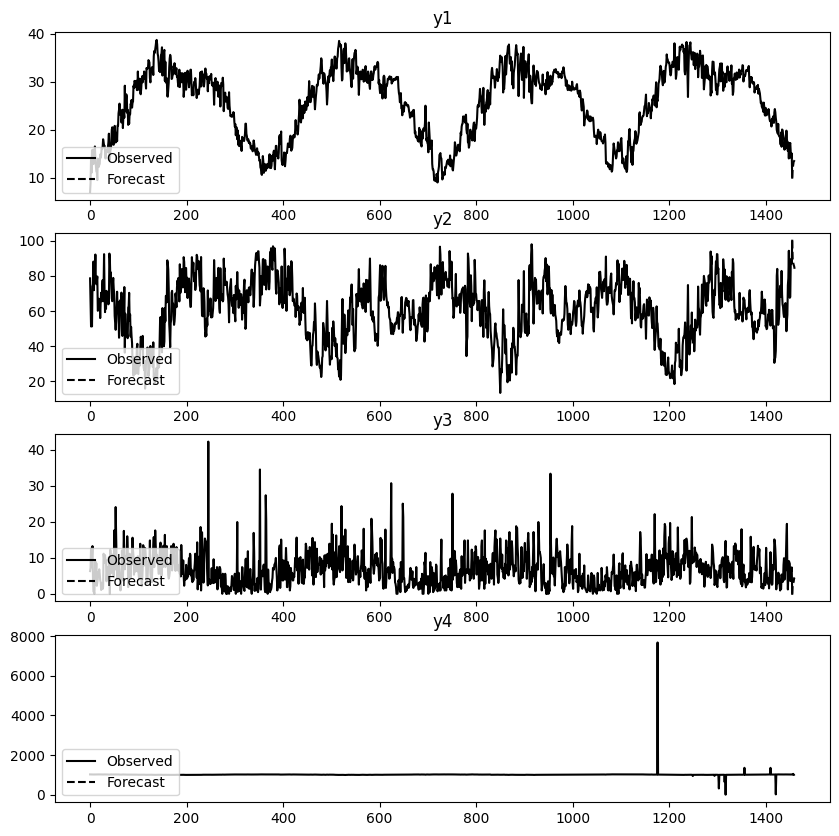

In [ ]:
vecm_res.plot_forecast(steps=5, plot_conf_int=False)

In [ ]:
print(vecm_res.var_rep[0])  # A_1
vecm_res.var_rep


[[ 8.05644456e-01  8.54350013e-03 -2.12990345e-02  3.92305467e-05]
 [ 7.83181191e-01  9.07456514e-01  4.13603149e-02 -6.17460991e-04]
 [-6.53707276e-02 -9.12908259e-02  3.35987992e-01  3.37231643e-04]
 [ 1.40054582e+00  8.70579917e-02 -2.60697846e-01  3.42900882e-05]]


array([[[ 8.05644456e-01,  8.54350013e-03, -2.12990345e-02,
          3.92305467e-05],
        [ 7.83181191e-01,  9.07456514e-01,  4.13603149e-02,
         -6.17460991e-04],
        [-6.53707276e-02, -9.12908259e-02,  3.35987992e-01,
          3.37231643e-04],
        [ 1.40054582e+00,  8.70579917e-02, -2.60697846e-01,
          3.42900882e-05]],

       [[ 2.72537761e-02, -1.10642362e-02,  5.65532099e-03,
          3.89402081e-04],
        [-9.67119245e-01, -1.58982554e-01,  1.51951694e-02,
         -2.03197132e-03],
        [ 4.25531524e-01,  9.82772015e-02,  5.48569521e-03,
         -1.66750514e-04],
        [-1.29400458e+01, -8.89108434e-01,  4.14367245e-01,
          1.17364754e-02]],

       [[-3.73922225e-02,  1.95725177e-04,  1.82831935e-02,
          1.43770124e-04],
        [ 1.97192813e-01,  2.24900587e-03, -8.19553583e-02,
         -8.62683351e-04],
        [-7.72172660e-02, -8.91675511e-03,  4.06830296e-02,
         -3.04173182e-04],
        [ 1.60628186e+01,  1.85058748e+

In [ ]:
vecm_res.ma_rep(maxn=2)

array([[[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00]],

       [[ 8.05644456e-01,  8.54350013e-03, -2.12990345e-02,
          3.92305467e-05],
        [ 7.83181191e-01,  9.07456514e-01,  4.13603149e-02,
         -6.17460991e-04],
        [-6.53707276e-02, -9.12908259e-02,  3.35987992e-01,
          3.37231643e-04],
        [ 1.40054582e+00,  8.70579917e-02, -2.60697846e-01,
          3.42900882e-05]],

       [[ 6.84455152e-01,  5.51946391e-03, -1.83172134e-02,
          4.08551312e-04],
        [ 3.70980678e-01,  6.67356308e-01,  5.01043933e-02,
         -2.54763886e-03],
        [ 2.79877230e-01, -1.57670106e-02,  1.15902227e-01,
          3.70826588e-07],
        [-1.17264316e+01, -7.74339222e-

In [ ]:
granger_results = vecm_res.test_granger_causality(caused="Dp", signif=0.05)
granger_results.summary()

ValueError: ignored

In [ ]:
print(granger_results)

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: R does not Granger-cause Dp: reject at 5% significance level. Test statistic: 3.531, critical value: 2.423>, p-value: 0.008>


In [ ]:
granger_results.signif, granger_results.pvalue

(0.05, 0.008449053735648129)

In [ ]:
inst_caus_dp_r = vecm_res.test_inst_causality(causing="Dp")
inst_caus_r_dp = vecm_res.test_inst_causality(causing="R")
inst_caus_r_dp.summary()

Test statistic,Critical value,p-value,df
0.6068,3.841,0.436,1


In [ ]:
inst_caus_dp_r == inst_caus_r_dp

True

In [ ]:
granger_results == vecm_res.test_granger_causality(caused="R", signif=0.05)

False

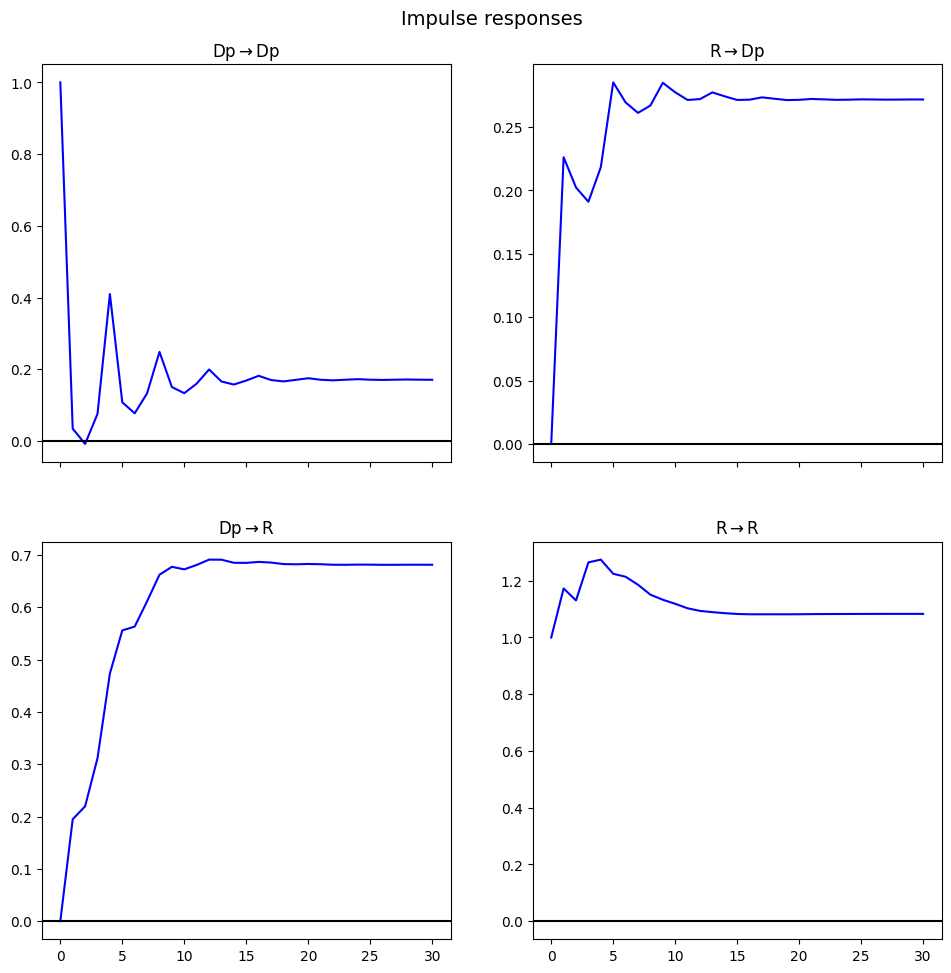

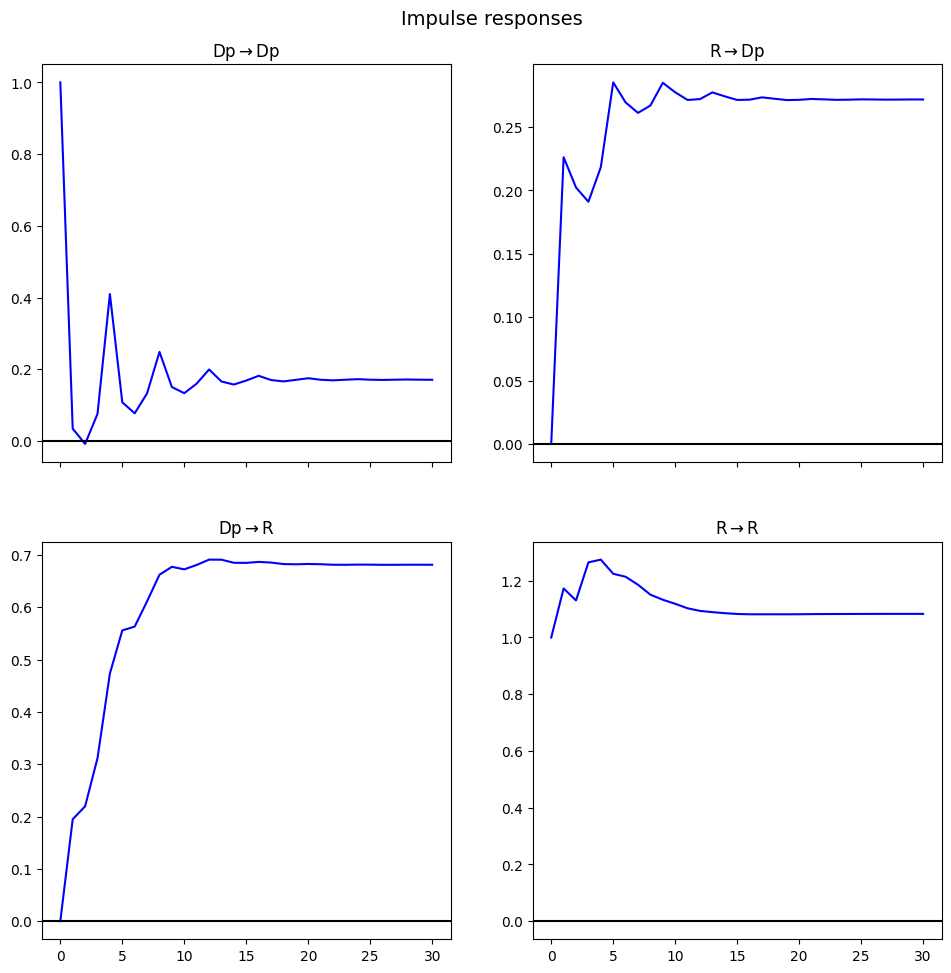

In [ ]:
num_periods = 30
ir = vecm_res.irf(periods=num_periods)
ir.plot(plot_stderr=False)

In [ ]:
norm_test = vecm_res.test_normality()
norm_test.summary()

Test statistic,Critical value,p-value,df
2.118,9.488,0.714,4


In [ ]:
norm_test.test_statistic, norm_test.crit_value, norm_test.pvalue

(2.117800919338863, 9.487729036781154, 0.7141027804379518)

In [ ]:
white_test = vecm_res.test_whiteness(nlags=12, adjusted=True)
white_test.summary()


Test statistic,Critical value,p-value,df
33.52,48.60,0.491,34


In [ ]:
white_test.test_statistic, white_test.crit_value, white_test.pvalue

(33.51814228583852, 48.602367367294164, 0.49108854964096826)

In [ ]:
# imports 
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.vector_ar.vecm import *
import pandas


In [ ]:
import statsmodels.datasets.interest_inflation.data as d
df = d.load_pandas().data
dates = df[["year", "quarter"]].astype(int).astype(str)
quarterly = dates["year"] + "Q" + dates["quarter"]
from statsmodels.tsa.base.datetools import dates_from_str
quarterly = dates_from_str(quarterly)
data = df[["Dp", "R"]]
data.index = pandas.DatetimeIndex(quarterly)

<class 'statsmodels.datasets.utils.Dataset'>

In [ ]:
X = data.data

In [ ]:
X = X[['realgdp','realcons','realinv']]

In [ ]:
X = np.log(X).diff().dropna()

In [ ]:
model = VAR(X)

In [ ]:
model_summary = model.fit()

In [ ]:
model_summary.summary()